In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
NAs = pd.concat([df_train.isnull().sum(),df_test.isnull().sum()], axis=1,keys=['train','test'])

In [9]:
NAs[NAs.sum(axis=1)>0]

,train,test
Alley,1369,1352.0
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0
BsmtFinType1,37,42.0
BsmtFinType2,38,42.0
BsmtFullBath,0,2.0
BsmtHalfBath,0,2.0
BsmtQual,37,44.0


In [11]:
label = df_train.pop('SalePrice')

In [48]:
Data=pd.concat([df_train,df_test])

In [49]:
Data.drop(['Alley','Fence','FireplaceQu','LotFrontage','MiscFeature','PoolQC'],axis=1, inplace=True)

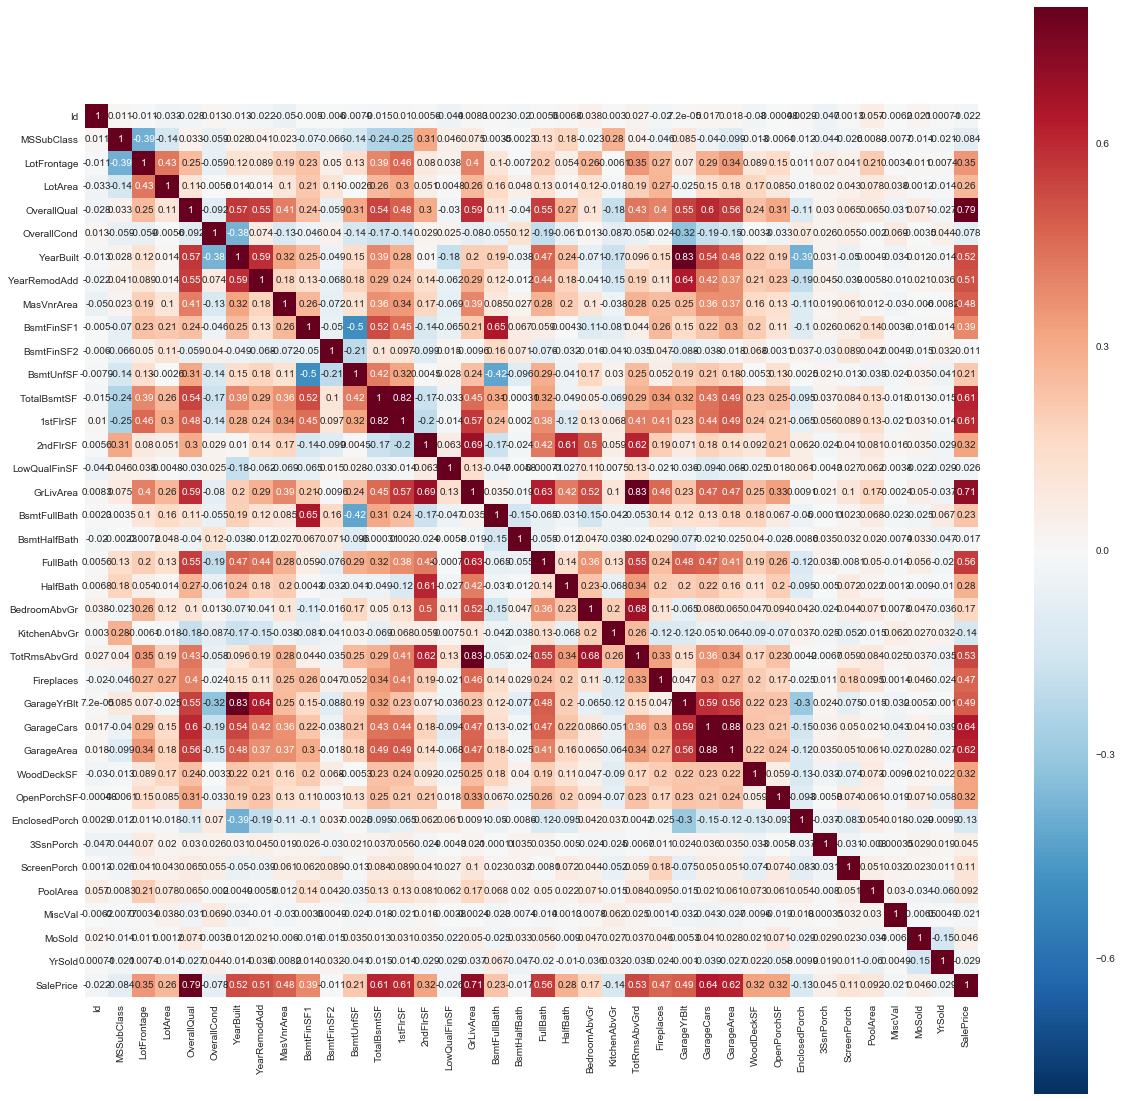

In [30]:
%matplotlib inline
corrmat =  pd.read_csv('train.csv').corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True)
# plt.title(city1+' correlation plot')

In [50]:
Data.drop(['OverallCond','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','3SsnPorch','MiscVal','YrSold'],axis=1, inplace=True)

In [61]:
# Data.drop(['PoolArea','MoSold'],axis=1, inplace=True)
# 'BsmtFinSF1', 'BsmtFinSF2'
Data.drop(['BsmtFinSF1'],axis=1, inplace=True)

In [62]:
new_NAs = Data.isnull().sum()

In [63]:
new_NAs[new_NAs>0]

MSZoning          4
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       24
MasVnrArea       23
BsmtQual         81
BsmtCond         82
BsmtExposure     82
BsmtFinType1     79
BsmtFinType2     80
BsmtUnfSF         1
TotalBsmtSF       1
Electrical        1
BsmtFullBath      2
KitchenQual       1
Functional        2
GarageType      157
GarageYrBlt     159
GarageFinish    159
GarageCars        1
GarageArea        1
GarageQual      159
GarageCond      159
SaleType          1
dtype: int64

In [65]:
Data['MSZoning'] = Data['MSZoning'].fillna(Data['MSZoning'].mode()[0])
Data['Utilities'] = Data['Utilities'].fillna(Data['Utilities'].mode()[0])
Data['Exterior1st'] = Data['Exterior1st'].fillna(Data['Exterior1st'].mode()[0])
Data['Exterior2nd'] = Data['Exterior2nd'].fillna(Data['Exterior2nd'].mode()[0])
Data['MasVnrType'] = Data['MasVnrType'].fillna(Data['MasVnrType'].mode()[0])
Data['MasVnrArea'] = Data['MasVnrArea'].fillna(Data['MasVnrArea'].mean())
Data['GarageYrBlt'] = Data['GarageYrBlt'].fillna(Data['GarageYrBlt'].mean())
Data['GarageCars'] = Data['GarageCars'].fillna(Data['GarageCars'].mean())
Data['GarageArea'] = Data['GarageArea'].fillna(Data['GarageArea'].mean())
Data['BsmtUnfSF'] = Data['BsmtUnfSF'].fillna(Data['BsmtUnfSF'].mean())
Data['TotalBsmtSF'] = Data['TotalBsmtSF'].fillna(Data['TotalBsmtSF'].mean())
Data['Electrical'] = Data['Electrical'].fillna(Data['Electrical'].mode()[0])
Data['BsmtFullBath'] = Data['BsmtFullBath'].fillna(Data['BsmtFullBath'].mode()[0])
Data['KitchenQual'] = Data['KitchenQual'].fillna(Data['KitchenQual'].mode()[0])
Data['Functional'] = Data['Functional'].fillna(Data['Functional'].mode()[0])
Data['SaleType'] = Data['SaleType'].fillna(Data['SaleType'].mode()[0])
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','GarageCond'):
    Data[col] = Data[col].fillna('NoBSMT')
for col in ('GarageType', 'GarageFinish', 'GarageQual'):
    Data[col] = Data[col].fillna('NoGRG')

In [71]:
Data['TotalSF'] = Data['TotalBsmtSF'] + Data['1stFlrSF'] + Data['2ndFlrSF']
Data.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d650e10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x123f8f940>]], dtype=object)

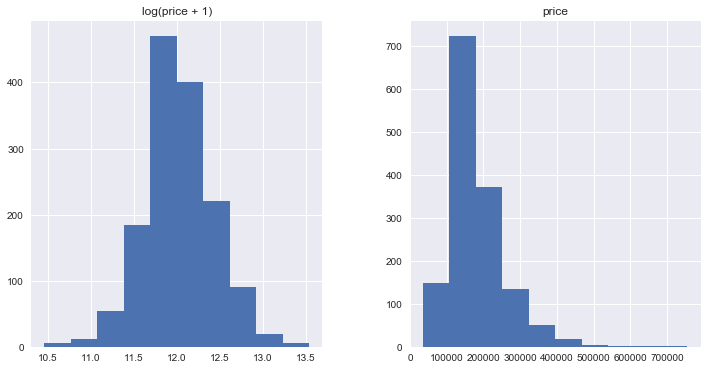

In [75]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":label, "log(price + 1)":np.log1p(label)})
prices.hist()

In [76]:
label = np.log1p(label)

In [77]:
Data = pd.get_dummies(Data)

In [80]:
X_train = Data[:df_train.shape[0]]
X_test = Data[df_train.shape[0]:]

In [84]:
x_train_T, x_test_T, y_train_T, y_test_T = train_test_split(X_train, label, test_size=0.1, random_state=200)

In [87]:
from sklearn.metrics import r2_score, mean_squared_error
# Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Shows scores for train and validation sets    
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)

In [90]:
from sklearn import linear_model,ensemble
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(x_train_T, y_train_T)
train_test(ENSTest, x_train_T, x_test_T, y_train_T, y_test_T)

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2: 0.9224846732541098
RMSE: 0.10496596200643091
Test
R2: 0.8298274539291404
RMSE: 0.17054071328769824


In [125]:
GBest = ensemble.GradientBoostingRegressor(n_estimators=1500, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(x_train_T, y_train_T)
train_test(GBest, x_train_T, x_test_T, y_train_T, y_test_T)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=15,
             min_samples_split=10, min_weight_fraction_leaf=0.0,
             n_estimators=1500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
R2: 0.9549795611119161
RMSE: 0.08068876862832484
Test
R2: 0.8551737047754038
RMSE: 0.1516409092391248


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=15,
             min_samples_split=10, min_weight_fraction_leaf=0.0,
             n_estimators=3000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [105]:
pd.DataFrame({'Id': X_test.Id, 'SalePrice':lab}).to_csv('ans.csv', index =False)  

In [107]:
lab=np.exp(GBest.predict(X_test))

In [108]:
pd.DataFrame({'Id': X_test.Id, 'SalePrice':lab}).to_csv('ans1.csv', index =False)  

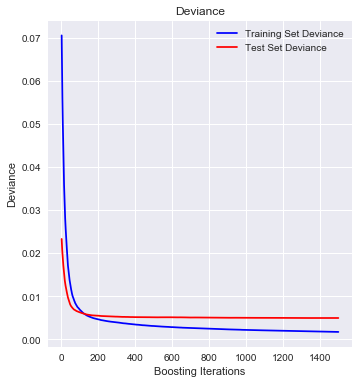

In [126]:
test_score = (np.zeros(1500))
for i, y_pred in enumerate(GBest.staged_predict(x_test_T)):
    test_score[i] = GBest.loss_(y_test_T, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(1500) + 1, GBest.train_score_, 'b-',
        label='Training Set Deviance')
plt.plot(np.arange(1500) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')